In [1]:
import sys
sys.path.append('one_output_node')
from mutation_tree import MutationTree

#sys.path.append('Enviroment')
from Enviroment import MutTreeEnv
from agent import Agent
from read import read_data, read_newick

import dendropy as dy
import graphviz
from Bio import Phylo
from io import StringIO
import numpy as np
import random
import glob
import matplotlib.pyplot as plt

In [2]:
alpha = 0.01
beta = 0.2

In [4]:
file = open("/home/max/Master_Thesis/Data/test_0__n5_m5_fn0.200_fp1.000e-02_1doublets.noisy", "r")
input = file.read()
rows = input.split('\n')
rows = rows[0:len(rows)-1]
matrix = [row.split(' ') for row in rows]
matrix = np.array(matrix, dtype=int)


In [6]:
matrix

array([[0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
graphviz.Source.from_file("/home/max/Master_Thesis/Data/test_0__n5_m5_fn0.200_fp1.000e-02.gv")

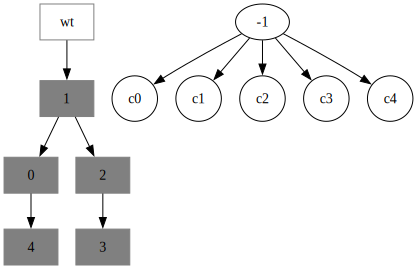

In [7]:
path = "/home/max/Master_Thesis/Data/test_0__n5_m5_fn0.200_fp1.000e-02.newick"
file = open(path, "r")
content = file.read()
newick = content.split("\n")[0]

test = MutationTree(5,5)
test.use_newick_string(newick)
gt_llh = test.conditional_llh(matrix, alpha, beta)
test.to_graphviz()

In [3]:
agent = Agent(5, 5, alpha, beta)

In [4]:
agent.train_net("/home/max/Master_Thesis/Data", 128, 20)

0.0 %, MSE: 0.19296273589134216


KeyboardInterrupt: 

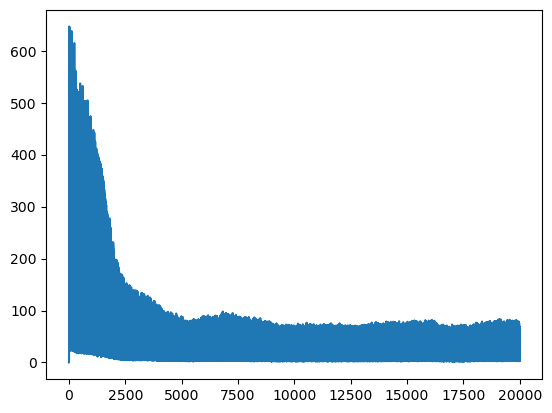

In [9]:
agent.plot_learning_curve("test.png")

(array([7.5730e+03, 3.8000e+01, 1.2457e+04, 1.2436e+05, 3.0500e+03,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6389e+04]),
 array([-50., -35., -20.,  -5.,  10.,  25.,  40.,  55.,  70.,  85., 100.]),
 <BarContainer object of 10 artists>)

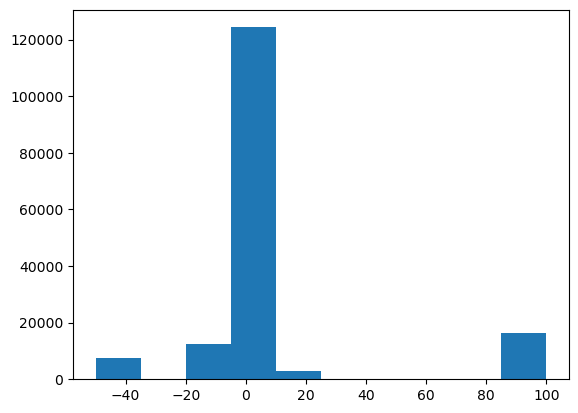

In [10]:
plt.hist(agent.rewards)

In [10]:
agent.save_net("trained_net.py")

In [8]:
agent.load_net("trained_net.py")

In [11]:
result = agent.solve_tree(matrix, 10)

In [165]:
observation = agent.env.reset(gt_llh, matrix)

In [14]:
import torch

-5.15 100


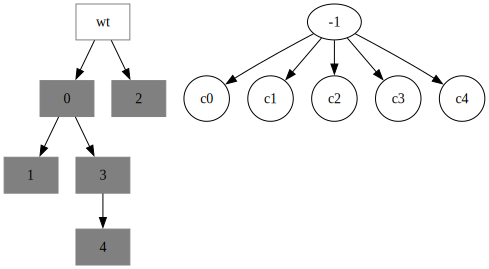

In [198]:
state = torch.tensor(observation, dtype=torch.float32, device="cuda").unsqueeze(0)
action_idx = agent.predict_step(state)
observation, reward, done, invalid = agent.env.step(action_idx.item())
print(round(agent.env.current_llh, 2), reward)
agent.env.tree.to_graphviz("result.png")

In [12]:
print(result.conditional_llh(matrix, alpha, beta))
print(test.conditional_llh(matrix, alpha, beta))

-16.701471600625442
-5.1547792731844


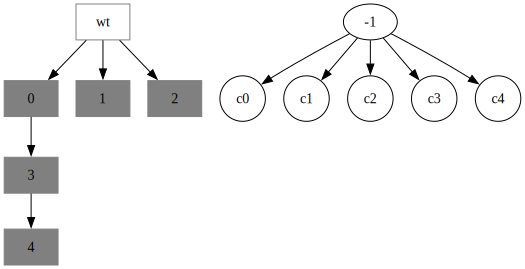

In [14]:
result.to_graphviz("res.png")